# Model a light curve
Use photodynam to generate a model light curve, for injection or to compare with some data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import funcs
import known_system_params

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
# Kepler 16
cb = known_system_params.k16

In [3]:
# load the lightcurve, we'll use Kepler 16
lc = np.genfromtxt('lightcurves/K16_clean_noecl.txt')
time = lc[:,0]+2454833.
flux = lc[:,1]
err = lc[:,2]

In [4]:
# make a model light curve
f_pl, v_pl = funcs.pd_cb(cb, times=time, run='/Users/grant/astro/code/github/photodynam/photodynam')

# now one with no planet transits
tmp = float(cb.rp)
cb.rp = 0.0
f_nopl, v_nopl = funcs.pd_cb(cb, times=time, run='/Users/grant/astro/code/github/photodynam/photodynam')
cb.rp = tmp

# divide planet by no-planet to get a no-binary light curve
f_nobin = f_pl / f_nopl

<IPython.core.display.Javascript object>


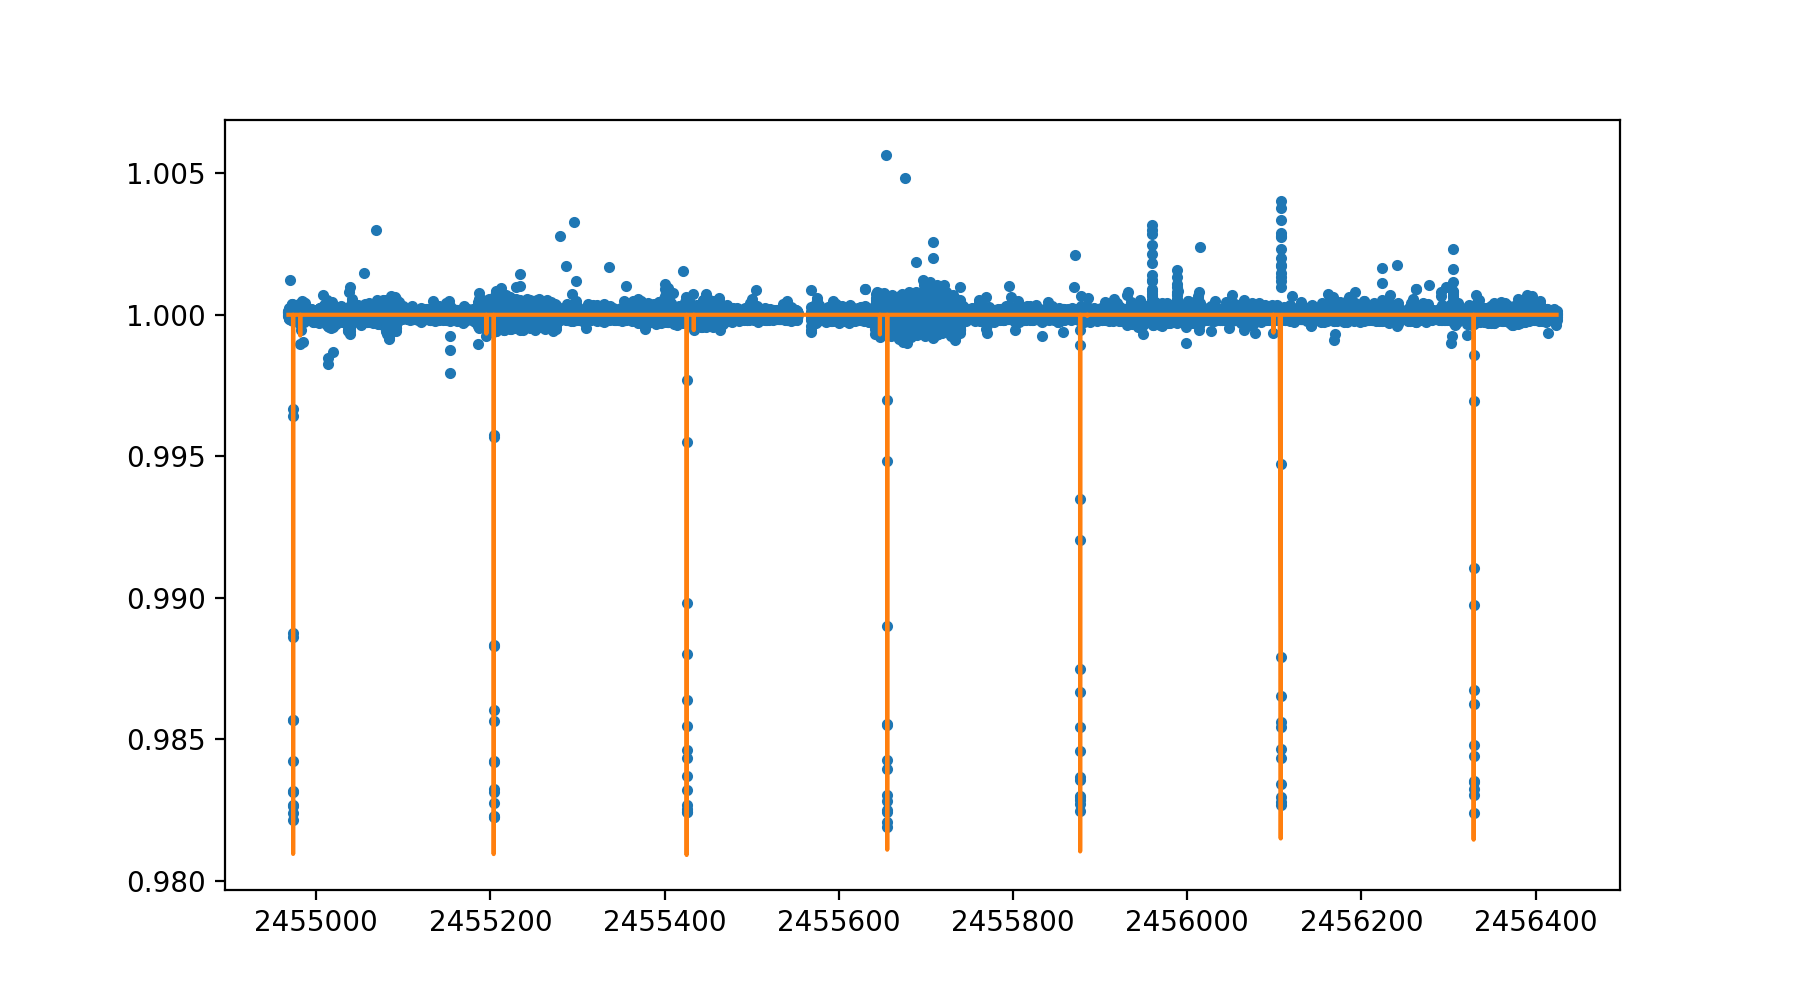

In [5]:
# compare it with the cleaned no-binary light curve
fig,ax = plt.subplots(figsize=(9,5))
ax.plot(time, flux, '.')
ax.plot(time, f_nobin)